In [1]:
from qiskit import *
import numpy as np
%matplotlib inline

In [2]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr,cr)

In [3]:
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0: 4/

In [4]:
circuit.x(qr[0])
circuit.x(qr[1])

circuit.draw()

┌───┐
q0_0: ┤ X ├
      ├───┤
q0_1: ┤ X ├
      └───┘
q0_2: ─────
           
q0_3: ─────
           
c0: 4/═════

In [5]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit,backend=simulator)
result=job.result()
out=result.get_statevector(circuit, decimals=3)
print(out)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [6]:
circuit.barrier()
circuit.measure(qr[0],cr[0])
circuit.measure(qr[1],cr[1])
circuit.measure(qr[2],cr[2])
circuit.measure(qr[3],cr[3])
circuit.barrier()

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,backend=simulator)
result=job.result()
counts=result.get_counts()
print(counts)

{'0011': 1024}


In [7]:
circuit.draw()

┌───┐ ░ ┌─┐          ░ 
q0_0: ┤ X ├─░─┤M├──────────░─
      ├───┤ ░ └╥┘┌─┐       ░ 
q0_1: ┤ X ├─░──╫─┤M├───────░─
      └───┘ ░  ║ └╥┘┌─┐    ░ 
q0_2: ──────░──╫──╫─┤M├────░─
            ░  ║  ║ └╥┘┌─┐ ░ 
q0_3: ──────░──╫──╫──╫─┤M├─░─
            ░  ║  ║  ║ └╥┘ ░ 
c0: 4/═════════╩══╩══╩══╩════
               0  1  2  3

In [8]:
circuit.rx(np.pi/2,qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├───
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤   
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├───
            ░  ║  ║  ║ └╥┘ ░    └───┘   
c0: 4/═════════╩══╩══╩══╩═══════════════
               0  1  2  3

In [9]:
circuit.cx(qr[0],qr[1])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[2],qr[3])
circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐               
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├──■────────────
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘┌─┴─┐          
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───┤ X ├──■───────
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   └───┘┌─┴─┐     
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├────────┤ X ├──■──
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤        └───┘┌─┴─┐
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├─────────────┤ X ├
            ░  ║  ║  ║ └╥┘ ░    └───┘             └───┘
c0: 4/═════════╩══╩══╩══╩══════════════════════════════
               0  1  2  3

In [10]:
theta=0.11
circuit.barrier()
circuit.rz(theta,qr[3])
circuit.barrier()
circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐                ░              ░ 
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├──■─────────────░──────────────░─
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘┌─┴─┐           ░              ░ 
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───┤ X ├──■────────░──────────────░─
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   └───┘┌─┴─┐      ░              ░ 
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├────────┤ X ├──■───░──────────────░─
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ 
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─
            ░  ║  ║  ║ └╥┘ ░    └───┘             └───┘ ░ └──────────┘ ░ 
c0: 4/═════════╩══╩══╩══╩════════════════════════════════════════════════
               0  1  2  3

In [11]:
circuit.cx(qr[2],qr[3])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[0],qr[1])
circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐                ░              ░      »
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├──■─────────────░──────────────░──────»
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘┌─┴─┐           ░              ░      »
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───┤ X ├──■────────░──────────────░──────»
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   └───┘┌─┴─┐      ░              ░      »
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├────────┤ X ├──■───░──────────────░───■──»
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐»
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├»
            ░  ║  ║  ║ └╥┘ ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘»
c0: 4/═════════╩══╩══╩══╩═════════════════════════════════════════════════════»
               0  1  2  3                                                     »
«                
«q0_0: ───────■──
«           ┌─┴─┐
«q0_1: ──■──┤ X ├
«      ┌─┴─┐└───┘
«q0_2: ┤ X ├─────
«      └───┘     
«q0_3: ──────────
«                
«c0: 4/══════════
«

In [12]:
circuit.barrier()
circuit.rx(-(np.pi/2),qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.barrier()
circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐                ░              ░      »
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├──■─────────────░──────────────░──────»
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘┌─┴─┐           ░              ░      »
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───┤ X ├──■────────░──────────────░──────»
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   └───┘┌─┴─┐      ░              ░      »
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├────────┤ X ├──■───░──────────────░───■──»
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐»
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├»
            ░  ║  ║  ║ └╥┘ ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘»
c0: 4/═════════╩══╩══╩══╩═════════════════════════════════════════════════════»
               0  1  2  3                                                     »
«                 ░ ┌──────────┐ ░ 
«q0_0: ───────■───░─┤ RX(-π/2) ├─░─
«           ┌─┴─┐ ░ └──┬───┬───┘ ░ 
«q0_1: ──■──┤ X ├─░────┤ H ├─────░─
«      ┌─┴─┐└───┘ ░    ├───┤     ░ 
«q0_2: ┤ X ├──────░────┤ H ├─────░─
«      └───┘      ░    ├───┤     ░ 
«q0_3: ───────────░────┤ H ├─────░─
«                 ░    └───┘     ░ 
«c0: 4/════════════════════════════
«

In [13]:
circuit.measure(qr[0],cr[0])
circuit.measure(qr[1],cr[1])
circuit.measure(qr[2],cr[2])
circuit.measure(qr[3],cr[3])
circuit.barrier()

circuit.draw()

┌───┐ ░ ┌─┐          ░ ┌─────────┐                ░              ░      »
q0_0: ┤ X ├─░─┤M├──────────░─┤ RX(π/2) ├──■─────────────░──────────────░──────»
      ├───┤ ░ └╥┘┌─┐       ░ └──┬───┬──┘┌─┴─┐           ░              ░      »
q0_1: ┤ X ├─░──╫─┤M├───────░────┤ H ├───┤ X ├──■────────░──────────────░──────»
      └───┘ ░  ║ └╥┘┌─┐    ░    ├───┤   └───┘┌─┴─┐      ░              ░      »
q0_2: ──────░──╫──╫─┤M├────░────┤ H ├────────┤ X ├──■───░──────────────░───■──»
            ░  ║  ║ └╥┘┌─┐ ░    ├───┤        └───┘┌─┴─┐ ░ ┌──────────┐ ░ ┌─┴─┐»
q0_3: ──────░──╫──╫──╫─┤M├─░────┤ H ├─────────────┤ X ├─░─┤ RZ(0.11) ├─░─┤ X ├»
            ░  ║  ║  ║ └╥┘ ░    └───┘             └───┘ ░ └──────────┘ ░ └───┘»
c0: 4/═════════╩══╩══╩══╩═════════════════════════════════════════════════════»
               0  1  2  3                                                     »
«                 ░ ┌──────────┐ ░ ┌─┐          ░ 
«q0_0: ───────■───░─┤ RX(-π/2) ├─░─┤M├──────────░─
«           ┌─┴─┐ ░ └──┬───┬───┘ ░ └╥┘┌─┐       ░ 
«q0_1: ──■──┤ X ├─░────┤ H ├─────░──╫─┤M├───────░─
«      ┌─┴─┐└───┘ ░    ├───┤     ░  ║ └╥┘┌─┐    ░ 
«q0_2: ┤ X ├──────░────┤ H ├─────░──╫──╫─┤M├────░─
«      └───┘      ░    ├───┤     ░  ║  ║ └╥┘┌─┐ ░ 
«q0_3: ───────────░────┤ H ├─────░──╫──╫──╫─┤M├─░─
«                 ░    └───┘     ░  ║  ║  ║ └╥┘ ░ 
«c0: 4/═════════════════════════════╩══╩══╩══╩════
«                                   0  1  2  3

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,backend=simulator,shots=2000)
result=job.result()
counts_2=result.get_counts()
print(counts_2)

{'0011': 1992, '1100': 8}


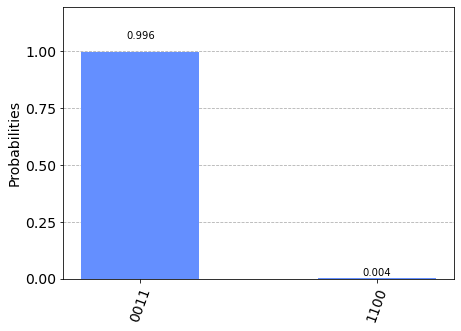

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_2)

In [15]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_santiago')
job_q = execute(circuit, backend=qcomp)

/Users/marwa/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [16]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


In [17]:
result_q=job_q.result()

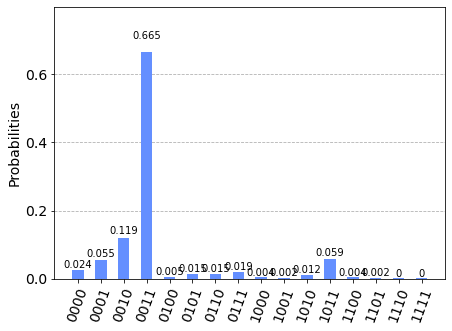

In [18]:
plot_histogram(result_q.get_counts(circuit))